In [2]:
# Download some digit images from MNIST dataset
import requests

urls = {
    "mnist_0.jpg": "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg",
    "mnist_1.jpg": "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg",
}

for filename, url in urls.items():
    r = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(r.content)


In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
print("torch version : {}".format(torch.__version__))

torch version : 2.5.1


1. Converting the images to batch tensors

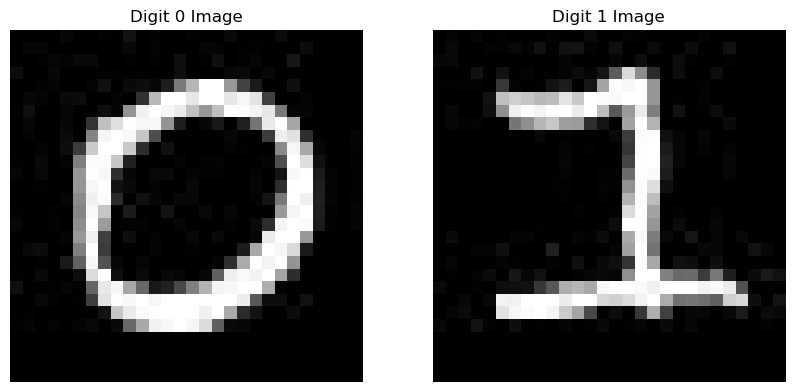

In [5]:
# Converting the images to batch tensors

   # Tensors: In PyTorch, tensors are multi-dimensional arrays similar to NumPy arrays, but with additional capabilities for GPU acceleration and automatic differentiation. 
   #          Tensors are the fundamental building blocks for representing data and parameters in neural networks.
   # Batches: Batching is a technique where multiple data samples (images, in this case) are grouped together into a single tensor. 
   #          This allows efficient processing of multiple samples simultaneously, to take advantage of the parallel processing capabilities of modern hardware.


digit_0_array_og = cv2.imread("mnist_0.jpg")
digit_1_array_og = cv2.imread("mnist_1.jpg")

digit_0_array_gray = cv2.imread("mnist_0.jpg",cv2.IMREAD_GRAYSCALE )
digit_1_array_gray = cv2.imread("mnist_1.jpg",cv2.IMREAD_GRAYSCALE )

# Visualize the image

fig, axs = plt.subplots(1,2, figsize=(10,5))


axs[0].imshow(digit_0_array_og, cmap='gray',interpolation='none')
axs[0].set_title("Digit 0 Image")
axs[0].axis('off')

axs[1].imshow(digit_1_array_og, cmap="gray", interpolation = 'none')
axs[1].set_title("Digit 1 Image")
axs[1].axis('off')

plt.show()

In [6]:
#Numpy array with three channels
print("Image array shape: ",digit_0_array_og.shape)
print(f"Min pixel value:{np.min(digit_0_array_og)} ; Max pixel value : {np.max(digit_0_array_og)}")

Image array shape:  (28, 28, 3)
Min pixel value:0 ; Max pixel value : 255


In [7]:
# We will have a look at 28x28 single channel image's pixel values
digit_0_array_gray

array([[  0,   0,   0,   0,   7,   1,   0,   3,   0,  18,   0,   3,   0,
          0,   3,   0,   0,   9,   0,   2,   0,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   7,   7,   0,   0,   0,   0,   0,   2,   8,   0,   4,   0,
          0,   0,   6,   4,   0,   2,   3,   2,   0,   0,  11,   0,   0,
          0,   0],
       [  1,   0,   2,   6,   4,   9,   9,   0,   0,   2,   0,   3,   1,
         15,   0,   2,  16,   0,   2,   7,   0,   0,  22,   0,   0,   0,
          0,   0],
       [ 12,   0,   0,   8,   1,   0,   0,   0,   2,   0,   0,   0,   0,
         14,   0,   0,   0,   7,   9,   0,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   3,   5,   0,   0,   4,  16,   0,  10,  14,   6,  29,
        122, 182, 255, 255, 152,  66,  26,   0,   0,  15,   0,   0,   0,
          0,   0],
       [  0,   7,   5,   0,   9,  12,   0,   0,   4,   0,  49, 184, 255,
        255, 232, 255, 255, 231, 246, 227,  64,   0,   0,   4,   0,   0,
          0,   0],
       [  

Shape of Normalised Digit 0 Tensor:  torch.Size([28, 28, 3])
Normalised Min pixel value: 0.0 ; Normalised Max pixel value : 1.0


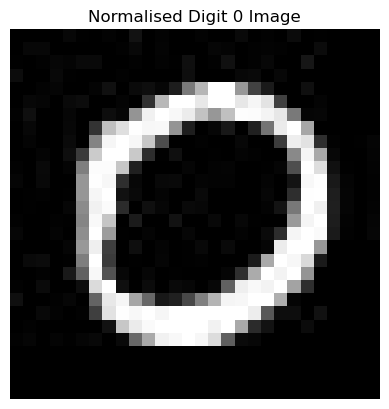

In [8]:
# Convert the images to PyTorch tensors and normalize
img_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32) / 255.0
img_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32) / 255.0

print("Shape of Normalised Digit 0 Tensor: ", img_tensor_0.shape)
print(f"Normalised Min pixel value: {torch.min(img_tensor_0)} ; Normalised Max pixel value : {torch.max(img_tensor_0)}")

plt.imshow(img_tensor_0,cmap="gray")
plt.title("Normalised Digit 0 Image")
plt.axis('off')
plt.show()

In [9]:
# Creating Input Batch

batch_tensor = torch.stack([img_tensor_0, img_tensor_1])

# In PyTorch the forward pass of input images to the model is expected to have a batch_size > 1
print("Batch Tensor Shape:", batch_tensor.shape)

Batch Tensor Shape: torch.Size([2, 28, 28, 3])


In [10]:
#Additionally in PyTorch, image tensors typically follow the shape convention [N ,C ,H ,W] unlike tensorflow which follows [N, H, W, C].
#Therefore, we need to bring the color channel to the second dimension. This can be achieved using either torch.view() or torch.permute().

batch_input = batch_tensor.permute(0,3,1,2)
print("Batch Tensor Shape:", batch_input.shape)

Batch Tensor Shape: torch.Size([2, 3, 28, 28])


2. Introduction to Tensors and its Operations

In [11]:
# Construct your first tensor

# Tensor with just ones in a column
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [12]:
# Tensor with just zeros in a column
b = torch.zeros(5)
print(b)

tensor([0., 0., 0., 0., 0.])


In [13]:
c = torch.tensor([1, 2, 3, 4, 5])
print(c)

tensor([1, 2, 3, 4, 5])


In [14]:
d = torch.zeros(3,2)
print(d)

e = torch.ones(3,2)
print(e)

f = torch.tensor([[1.0, 2.0],[3.0, 4.0]])
print(f)

# 3D Tensor
g = torch.tensor([[[1., 2.], [3., 4.]], [[5., 6.], [7., 8.]]])
print(g)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


In [15]:
# Finding shape of a tensor
print(f.shape)

print(e.shape)

# 2, 2x2s
print(g.shape)

torch.Size([2, 2])
torch.Size([3, 2])
torch.Size([2, 2, 2])


In [16]:
# Access an e;ement in a tensor

# Get element at index 2
print(c[2])

tensor(3)


In [17]:
# All indices starting from 0
# Examples with tensors more than 1 dimension

# Get element at row 1, column 0
print(f[1,0])

# We can also use the following
print(f[1][0])

# Similarly for 3D Tensor
print(g[1,0,0])
print(g[1][0][0])

tensor(3.)
tensor(3.)
tensor(5.)
tensor(5.)


In [18]:
# What if u wanted to access all elements in a row or column?

# All elements
print(f[:])

# All elements from index 1 to 2 (excluding element 3)
print(c[1:3])

# All elements till index 4 (exclusive)
print(c[:4])

# First row
print(f[0, :])

# Second column
print(f[:,1])

tensor([[1., 2.],
        [3., 4.]])
tensor([2, 3])
tensor([1, 2, 3, 4])
tensor([1., 2.])
tensor([2., 4.])


In [19]:
# Specifying data types

int_tensor = torch.tensor([[1,2,3],[4,5,6]])
print(int_tensor.dtype)

# What if we changed any one element to floating point number?
int_tensor = torch.tensor([[1,2,3],[4.,5,6]])
print(int_tensor.dtype)
print(int_tensor)

# This can be overridden as follows
float_tensor = torch.tensor([[1, 2, 3],[4., 5, 6]])
int_tensor = float_tensor.type(torch.int64)
print(int_tensor.dtype)
print(int_tensor)

torch.int64
torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


In [20]:
# Tensor to/from Numpy Array

# Tensor to Array
f_numpy = f.numpy()
print(f_numpy)

# Array to Tensor
h = np.array([[8,7,6,5],[4,3,2,1]])
h_tensor = torch.from_numpy(h)
print(h_tensor)

[[1. 2.]
 [3. 4.]]
tensor([[8, 7, 6, 5],
        [4, 3, 2, 1]])


In [21]:
# Arithmetic Ops on Tensors

# Create tensor
tensor1 = torch.tensor([[1,2,3],[4,5,6]])
tensor2 = torch.tensor([[-1,2,-3],[4,-5,6]])

# Addition
print(tensor1+tensor2)
# We can also use
print(torch.add(tensor1,tensor2))

# Subtraction
print(tensor1-tensor2)
# We can also use
print(torch.sub(tensor1,tensor2))

# Multiplication
# Tensor with Scalar
print(tensor1 * 2)

# Tensor with another tensor
# Elementwise Multiplication
print(tensor1 * tensor2)

# Matrix multiplication
tensor3 = torch.tensor([[1,2],[3,4],[5,6]])
print(torch.mm(tensor1,tensor3))

# Division
# Tensor with scalar
print(tensor1/2)

# Tensor with another tensor
# Elementwise division
print(tensor1/tensor2)

tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
tensor([[ -1,   4,  -9],
        [ 16, -25,  36]])
tensor([[22, 28],
        [49, 64]])
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])
tensor([[-1.,  1., -1.],
        [ 1., -1.,  1.]])


In [ ]:
# Broadcasting

#Two dimensions are broadcastable when:
#    They are equal, or
#    One of them is 1

# Create two 1-dimensional tensors
a = torch.tensor([1, 2, 3])
b = torch.tensor([4])

# adding a scalar to a vector
result = a + b
print("Result of Broadcasting ex 1:\n",result)

# Another example of broadcasting
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[2], [2]])
# b turns into [[2, 2], [2, 2]] to match the shape of a
# then does elementwise multiplication:
# so [[1*2, 2*2], [3*2, 4*2]]
result = a * b

print("Result of Broadcasting ex 1:\n",result)

Result of Broadcasting ex 1:
 tensor([5, 6, 7])
Result of Broadcasting ex 1:
 tensor([[2, 4],
        [6, 8]])


Broadcasting allows PyTorch to perform element-wise operations on tensors of

    - a is a 2-dimensional tensor with shape ([1, 3]).

    - b is a 2-dimensional tensor with shape ([3, 1]).

    - When adding a and b, PyTorch broadcasts both tensors to the common shape ([3, 3]), resulting in:


      1+4 2+4 3+4
      1+5 2+5 3+5 
      1+6 2+6 3+6

In [ ]:
# Create two tensors with shapes (1, 3) and (3, 1)
a = torch.tensor([[1, 2, 3]])
b = torch.tensor([[4], [5], [6]])

# adding tensors of different shapes
result = a + b
print("Shape: ", result.shape)
print("\n")
print("Result of Broadcasting:\n", result)

Shape:  torch.Size([3, 3])


Result of Broadcasting:
 tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


In [ ]:
# CPU vs GPU Tensor

# Create a tensor for CPU
# This will occupy CPU RAM
tensor_cpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cpu')

# Create a tensor for GPU
# This will occupy GPU RAM
tensor_gpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cuda')

In [ ]:
#Just like tensor creation, the operations performed for CPU and GPU tensors are also different and consume RAM corresponding to the device specified.
# This uses CPU RAM
tensor_cpu = tensor_cpu * 5

# This uses GPU RAM
# Focus on GPU RAM Consumption
tensor_gpu = tensor_gpu * 5

In [ ]:
#We can move the GPU tensor to CPU and vice versa as shown below.
# Move GPU tensor to CPU
tensor_gpu_cpu = tensor_gpu.to(device='cpu')

# Move CPU tensor to GPU
tensor_cpu_gpu = tensor_cpu.to(device='cuda')